# Average hand-written digit in the MNIST dataset

The following is a simple solution to exercise n.3, in section 3 lecture 28, of the course on Deep Learning by The Lazy Programmer. This course is available for free on Udemy, at the link: 

https://www.udemy.com/deep-learning-prerequisites-the-numpy-stack-in-python

The code calculates and shows how the average digit in the database provided looks like. The database used is a portion of the __MNIST__ dataset of hand-written digits. This database is commonly used for training convolutional neural networks in recognising digits written by humans, and by students in programming for learning purposes.
This particular code shows how to load and read csv files with Pandas, how to assign their content to the appropriate Numpy objects, and how to compute and plot the average value of multiple bitmaps.

## Dependencies

The only libraries that are required for this program are:

+ Pandas: Gives simple functions for parsing csv files and return their content

+ Numpy: Handles the linear algebra computations

+ Matplotlib.pyplot: For plotting images


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Content of the dataset

The dataset provided contains 9999 samples of individual digits, stored as rows of a CSV file. The rows contain a first element that acts as a label, identifying the digit described by that row. The remaining 784 elements of the same row describe a flattened 28x28 bitmap, where each pixel is described by the intensity of its colour, in the range of 0-255. The file itself is called mnist_test.csv and is provided in the directory of this repository.

We will first load the dataset with Pandas' built-in function *read_csv* that mandatory argument the path of the csv file to be loaded, and returns a DataFrame object.

In [3]:
data_location = 'mnist_test.csv'        # This can be changed with an url to allow for remote loading
try:
    df = pd.read_csv(data_location)
    print('Load successful')            # Gives positive feedback if the loading is successful
except:
    print('Load NOT successful')        # Gives negative feedback if the loading is unsuccessful

Load successful


## Converting the data into a Numpy array

We can verify the type of object returned by the *read_csv()* function by calling *type(object)* , to confirm that we have indeed the desired object. Note that this DataFrame is not immediately suitable for performing computation through Numpy. In order to be able to call Numpy functions on it, we are required to convert it to a Numpy object first.

The DataFrame object has a method called *as_matrix()* that converts the data it stores into a numpy.ndarray object. 
We will call this method and return an array that will be usable with Numpy's functions.

In [4]:
print(type(df),df.shape)
M = df.as_matrix()
print(type(M), M.shape)

<class 'pandas.core.frame.DataFrame'> (9999, 785)
<class 'numpy.ndarray'> (9999, 785)


## Displaying some samples

We will now show some of the samples from the dataset, to make sure we have parsed it and understood its structure correctly. The array $M$ should now store 785 column vectors, the first of which contains all the labels for each digit, while the remainder contains the flattened version of the image itself. 

The following *for* loop shows six samples selected from the distribution.

Label:  2
Size:  (28, 28)


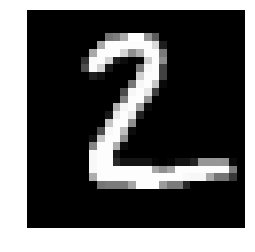

Label:  1
Size:  (28, 28)


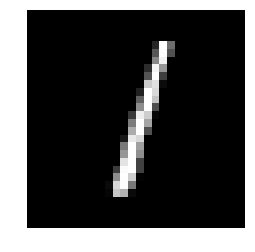

Label:  6
Size:  (28, 28)


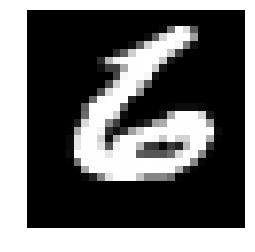

In [5]:
for image_number in [0,1,-1]:
    im = M[image_number,1:]                  # The array M is split, and the first column, containing the labels, is
    im = im.reshape(28,28)                   # excluded from the reshaping.
    print('Label: ', M[image_number,0])      # The first element of each row of M contains the label for that row
    print('Size: ', im.shape)
    plt.imshow(im, cmap='gray')             
    plt.axis('off')
    plt.show()

## Calculating the average-looking digit

The last lines of code show that we have parsed and interpreted correctly the dataset. We can now calculate how the average digit looks like.

To do so, we can apply the definition of average value on each element of the matrix $M$. Since we are interested in obtaining a row vector containing the average element of each column of $M$, the formula that computes the average image is thus the formula that computes average row vector of $M$. If $M_k$ is a row vector of $M$, and $n$ is the size of the dimension of $M$ on which summation is performed, the average row vector is:


\begin{equation*}
\frac{\sum_{k=1}^n M_k}{n}
\end{equation*}

We will need to be careful and remember to omit the labels on the first column while performing summation, as it contains labels, not pixels. We will store the average label on its own, and display along the average-looking digit in the output.

Average value:  4.44314431443
(28, 28)


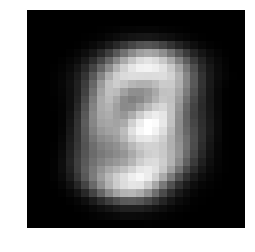

In [6]:
M_sum = np.zeros(M[:,1:].shape[1])     # Creates a zero row vector of dimensionality 784
avg_label = 0                       
for e in range(M.shape[0]):            # Cycles over all rows of M and adds its content, 
    M_sum += M[e,1:]                   # element-wise, to the array M_sum. Also adds the label value to 
    avg_label += M[e,0]                # avg_label

avg_label /= M.shape[0]                # The average value is calculating by dividing avg_label by the number of 
M_final = M_sum / M[:,1:].shape[1]     # rows of M, and by dividing M_sum by the number of columns of M,
M_final = M_final.reshape(28,28)       # with the exception of the first column that contains labels.
print('Average value: ', avg_label)    # M_final is then reshaped from its original shape, 1x784, to 28x28
print(M_final.shape)
plt.imshow(M_final, cmap='gray')
plt.axis('off')
plt.show()